## Prediksi kemenangan Tim mobile legends menggunakan Algoritma Backpropagation

Mata Kuliah         : Pembelajaran Mesin Dasar  
Kelas               : 2023 E

Anggota Kelompok    :  
1. Hizkia Marvel Abinaya (23031554061)  
2. Alfathrindra Agastyo Yulianto (23031554094)  
3. Andreas Setiandi Simorangkir (23031554200)

In [260]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import numpy as np 

# Preprocesing

In [261]:
file1 = "Games of the Future 2024 - BoxMatch.csv"
dataset1 = pd.read_csv(file1)
display(dataset1)
file2 = "MPL Indonesia Season 13 - BoxMatch.csv"
dataset2 = pd.read_csv(file2)
display(dataset2)
file3 = "MDLS10_2024_Results.csv"
dataset3 = pd.read_csv(file3)
display(dataset3)
file4 = "MPL Philippines Season 13 - BoxMatch.csv"
dataset4 = pd.read_csv(file4)
display(dataset4)

,Date,Stage,Match,Team,Ban,Role Ban,Role Pick,Players,Pick,MVP,...,Spell,Talent 3,K,D,A,Gold,Rating,Medal,Level,Win
0,2/26/2024,Group Stage,1,RRQ Hoshi,Guinevere,Fighter,Mage,Octa,Novaria,0,...,Flicker,Impure Rage,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Win
1,2/26/2024,Group Stage,1,RRQ Hoshi,Arlott,Fighter/Assassin,Fighter,Brusko,Chou,0,...,Flicker,Concussive Blast,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Win
2,2/26/2024,Group Stage,1,RRQ Hoshi,Mathilda,Support/Assassin,Assassin/Fighter,Banana,Benedetta,0,...,Petrify,Quantum Charge,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Win
3,2/26/2024,Group Stage,1,RRQ Hoshi,Minotaur,Tank/Support,Marksman,Skylar,Claude,1,...,Sprint,Quantum Charge,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Win
4,2/26/2024,Group Stage,1,RRQ Hoshi,Kaja,Support/Fighter,Fighter/Tank,Irrad,Fredrinn,0,...,Retribution,Concussive Blast,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Win
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,3/2/2024,Playoffs Grand Final,4,AP.Bren,Joy,Assassin,Fighter,KyleTzy,Guinevere,0,...,Retribution,Impure Rage,1,1,3,9368,6.2,Silver,15,Win
636,3/2/2024,Playoffs Grand Final,4,AP.Bren,Nolan,Assassin,Fighter/Tank,Owgwen,Ruby,0,...,Flicker,Brave Smite,0,0,8,8681,8.4,Golden,15,Win
637,3/2/2024,Playoffs Grand Final,4,AP.Bren,Novaria,Mage,Mage,Pheww,Nana,0,...,Flicker,Lethal Ignition,1,0,6,9700,8.5,Golden,15,Win
638,3/2/2024,Playoffs Grand Final,4,AP.Bren,X.Borg,Fighter,Marksman,Super Marco,Beatrix,1,...,Flicker,Quantum Charge,7,0,3,14562,11.7,Golden,15,Win


,Date,Stage,Match,Team,Win,Enemy,Players,Pick,Role Pick,Ban,...,K,D,A,Gold,Level,Tower,Lord,Turtle,Buff Merah,Buff Biru
0,3/8/2024,Regular Season,1,Alter Ego,Win,EVOS Glory,Pai,Terizla,Fighter,Gusion,...,1,0,6,9300.0,15,9,2,2,11.0,12.0
1,3/8/2024,Regular Season,1,Alter Ego,Win,EVOS Glory,Tazz,Nolan,Assassin,Faramis,...,4,1,2,12300.0,15,9,2,2,11.0,12.0
2,3/8/2024,Regular Season,1,Alter Ego,Win,EVOS Glory,Cr1te,Vexana,Mage,Ruby,...,4,1,5,9100.0,14,9,2,2,11.0,12.0
3,3/8/2024,Regular Season,1,Alter Ego,Win,EVOS Glory,Rasy,Tigreal,Tank,Baxia,...,0,1,8,9300.0,13,9,2,2,11.0,12.0
4,3/8/2024,Regular Season,1,Alter Ego,Win,EVOS Glory,Nino,Harith,Mage,Fredrinn,...,2,0,6,11100.0,15,9,2,2,11.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1855,5/19/2024,Regular Season,3,Geek Fam ID,Win,Rebellion Esports,Luke,Barats,Tank/Fighter,Kaja,...,2,4,9,8841.0,14,9,2,0,8.0,11.0
1856,5/19/2024,Regular Season,3,Geek Fam ID,Win,Rebellion Esports,Hazle,Fanny,Assassin,Roger,...,10,0,5,11994.0,15,9,2,0,8.0,11.0
1857,5/19/2024,Regular Season,3,Geek Fam ID,Win,Rebellion Esports,Aboy,Vexana,Mage,Moskov,...,0,2,11,7967.0,13,9,2,0,8.0,11.0
1858,5/19/2024,Regular Season,3,Geek Fam ID,Win,Rebellion Esports,Baloyskie,Franco,Tank,Luo Yi,...,2,6,7,7097.0,13,9,2,0,8.0,11.0


,Date,Stage,Match_id,Round,Player,Team,Pick,Win,Enemy,Role Pick,...,K,D,A,Gold,Level,Lord,Turtle,Tower,Buff\r\n Biru,Buff \r\nMerah
0,8/5/2024,GroupStage,mdl_gr1d1_m1,1,Saykots,EVOS Icon,Terizla,Win,Dewa United Morpheus,Fighter,...,4,3,8,7642,13,1,1,6,8,6
1,8/5/2024,GroupStage,mdl_gr1d1_m1,1,Nazara,EVOS Icon,Lancelot,Win,Dewa United Morpheus,Assassin,...,3,1,6,10359,15,1,1,6,8,6
2,8/5/2024,GroupStage,mdl_gr1d1_m1,1,Depezett,EVOS Icon,Zhask,Win,Dewa United Morpheus,Mage,...,4,1,9,7880,13,1,1,6,8,6
3,8/5/2024,GroupStage,mdl_gr1d1_m1,1,Alevaa,EVOS Icon,Khufra,Win,Dewa United Morpheus,Tank,...,0,3,6,5634,12,1,1,6,8,6
4,8/5/2024,GroupStage,mdl_gr1d1_m1,1,Inaya,EVOS Icon,Claude,Win,Dewa United Morpheus,Marksman,...,3,1,7,10780,15,1,1,6,8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,8/6/2024,GroupStage,mdl_gr1d2_m3,3,Chewy,Yasbih Esports,Grock,Win,Kagendra,Tank/Fighter,...,1,3,6,9288,15,0,2,3,6,10
136,8/6/2024,GroupStage,mdl_gr1d2_m3,3,Reyynn,Yasbih Esports,Alpha,Win,Kagendra,Fighter,...,4,5,4,10771,15,0,2,3,6,10
137,8/6/2024,GroupStage,mdl_gr1d2_m3,3,Joey,Yasbih Esports,Vexana,Win,Kagendra,Mage,...,3,2,7,10327,15,0,2,3,6,10
138,8/6/2024,GroupStage,mdl_gr1d2_m3,3,Kiyyy,Yasbih Esports,Mathilda,Win,Kagendra,Support/Assassin,...,0,2,10,8421,15,0,2,3,6,10


,Date,Stage,Match,Team,Players,Pick,Role Pick,Ban,Role Ban,Spell,...,D,A,Gold,Level,Win,Tower,Lord,Turtle,Buff \r\nMerah,Buff\r\n Biru
0,3/15/2024,Regular Season,1,Minana EVOS,Domeng,Clint,Marksman,Joy,Assassin,Flicker,...,0.0,8.0,18144.0,15,Win,6,0,1,11,8
1,3/15/2024,Regular Season,1,Minana EVOS,Kzen,Fredrinn,Fighter/Tank,Fanny,Assassin,Retribution,...,6.0,6.0,11841.0,15,Win,6,0,1,11,8
2,3/15/2024,Regular Season,1,Minana EVOS,Lancecy,Novaria,Mage,Nolan,Assassin,Flicker,...,3.0,9.0,13526.0,15,Win,6,0,1,11,8
3,3/15/2024,Regular Season,1,Minana EVOS,Kirk,Arlott,Fighter/Assassin,Cici,Fighter,Flicker,...,3.0,10.0,10453.0,15,Win,6,0,1,11,8
4,3/15/2024,Regular Season,1,Minana EVOS,SpiderMilez,Rafaela,Support,Paquito,Fighter/Assassin,Flicker,...,1.0,11.0,10345.0,15,Win,6,0,1,11,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,5/26/2024,Grand Final,4,AP.Bren,Super Marco,Roger,Fighter/Marksman,Lapu-Lapu,Fighter,Purify,...,2.0,2.0,0.0,15,Lose,6,0,3,0,0
1596,5/26/2024,Grand Final,4,AP.Bren,KyleTzy,Baxia,Tank,Paquito,Fighter/Assassin,Retribution,...,3.0,11.0,0.0,15,Lose,6,0,3,0,0
1597,5/26/2024,Grand Final,4,AP.Bren,Pheww,Pharsa,Mage,Luo Yi,Mage,Flicker,...,3.0,7.0,0.0,15,Lose,6,0,3,0,0
1598,5/26/2024,Grand Final,4,AP.Bren,FlapTzy,Yu Zhong,Fighter,Fredrinn,Fighter/Tank,Petrify,...,4.0,7.0,0.0,15,Lose,6,0,3,0,0


In [262]:
selected1 = dataset1[['K', 'D', 'A', 'Gold', 'Level', 'Time', 'Win']]
display(selected1)
selected2 = dataset2[['K', 'D', 'A', 'Gold', 'Level', 'Time', 'Win']]
display(selected2)
selected3 = dataset3[['K', 'D', 'A', 'Gold', 'Level', 'Time', 'Win']]
display(selected3)
selected4 = dataset4[['K', 'D', 'A', 'Gold', 'Level', 'Time', 'Win']]
display(selected4)

,K,D,A,Gold,Level,Time,Win
0,Nan,Nan,Nan,Nan,Nan,22:09,Win
1,Nan,Nan,Nan,Nan,Nan,22:09,Win
2,Nan,Nan,Nan,Nan,Nan,22:09,Win
3,Nan,Nan,Nan,Nan,Nan,22:09,Win
4,Nan,Nan,Nan,Nan,Nan,22:09,Win
...,...,...,...,...,...,...,...
635,1,1,3,9368,15,17:16,Win
636,0,0,8,8681,15,17:16,Win
637,1,0,6,9700,15,17:16,Win
638,7,0,3,14562,15,17:16,Win


,K,D,A,Gold,Level,Time,Win
0,1,0,6,9300.0,15,14:20,Win
1,4,1,2,12300.0,15,14:20,Win
2,4,1,5,9100.0,14,14:20,Win
3,0,1,8,9300.0,13,14:20,Win
4,2,0,6,11100.0,15,14:20,Win
...,...,...,...,...,...,...,...
1855,2,4,9,8841.0,14,14:16,Win
1856,10,0,5,11994.0,15,14:16,Win
1857,0,2,11,7967.0,13,14:16,Win
1858,2,6,7,7097.0,13,14:16,Win


,K,D,A,Gold,Level,Time,Win
0,4,3,8,7642,13,13:49,Win
1,3,1,6,10359,15,13:49,Win
2,4,1,9,7880,13,13:49,Win
3,0,3,6,5634,12,13:49,Win
4,3,1,7,10780,15,13:49,Win
...,...,...,...,...,...,...,...
135,1,3,6,9288,15,19:11,Win
136,4,5,4,10771,15,19:11,Win
137,3,2,7,10327,15,19:11,Win
138,0,2,10,8421,15,19:11,Win


,K,D,A,Gold,Level,Time,Win
0,5.0,0.0,8.0,18144.0,15,22:03,Win
1,0.0,6.0,6.0,11841.0,15,22:03,Win
2,3.0,3.0,9.0,13526.0,15,22:03,Win
3,3.0,3.0,10.0,10453.0,15,22:03,Win
4,4.0,1.0,11.0,10345.0,15,22:03,Win
...,...,...,...,...,...,...,...
1595,7.0,2.0,2.0,0.0,15,19:10,Lose
1596,2.0,3.0,11.0,0.0,15,19:10,Lose
1597,1.0,3.0,7.0,0.0,15,19:10,Lose
1598,5.0,4.0,7.0,0.0,15,19:10,Lose


In [263]:
dataset = pd.concat([selected1, selected2, selected3, selected4], axis=0)
display(dataset)

,K,D,A,Gold,Level,Time,Win
0,Nan,Nan,Nan,Nan,Nan,22:09,Win
1,Nan,Nan,Nan,Nan,Nan,22:09,Win
2,Nan,Nan,Nan,Nan,Nan,22:09,Win
3,Nan,Nan,Nan,Nan,Nan,22:09,Win
4,Nan,Nan,Nan,Nan,Nan,22:09,Win
...,...,...,...,...,...,...,...
1595,7.0,2.0,2.0,0.0,15,19:10,Lose
1596,2.0,3.0,11.0,0.0,15,19:10,Lose
1597,1.0,3.0,7.0,0.0,15,19:10,Lose
1598,5.0,4.0,7.0,0.0,15,19:10,Lose


In [264]:
dataset.isna().sum()

K        10
D        10
A        10
Gold     20
Level     0
Time      0
Win       0
dtype: int64

In [265]:
df_cleaned = dataset.dropna().copy()
display(df_cleaned)
print(df_cleaned.isna().sum())
print(dataset['Gold'].dtype)
print((dataset['Gold'] == 'Nan').sum())
print((df_cleaned == 0).sum())
df_cleaned.drop(index=df_cleaned[df_cleaned['Gold'] == 'Nan'].index, inplace=True)
df_cleaned.drop(index=df_cleaned[df_cleaned['Gold'] == 0].index, inplace=True)
display(df_cleaned)
df_cleaned.info()

,K,D,A,Gold,Level,Time,Win
0,Nan,Nan,Nan,Nan,Nan,22:09,Win
1,Nan,Nan,Nan,Nan,Nan,22:09,Win
2,Nan,Nan,Nan,Nan,Nan,22:09,Win
3,Nan,Nan,Nan,Nan,Nan,22:09,Win
4,Nan,Nan,Nan,Nan,Nan,22:09,Win
...,...,...,...,...,...,...,...
1595,7.0,2.0,2.0,0.0,15,19:10,Lose
1596,2.0,3.0,11.0,0.0,15,19:10,Lose
1597,1.0,3.0,7.0,0.0,15,19:10,Lose
1598,5.0,4.0,7.0,0.0,15,19:10,Lose


K        0
D        0
A        0
Gold     0
Level    0
Time     0
Win      0
dtype: int64
object
40
K        884
D        683
A        226
Gold      10
Level      0
Time       0
Win        0
dtype: int64


,K,D,A,Gold,Level,Time,Win
10,2,2,10,10088,15,18:24,Lose
11,9,3,5,12283,15,18:24,Lose
12,1,3,6,11045,15,18:24,Lose
13,1,4,5,10778,15,18:24,Lose
14,2,2,9,11891,15,18:24,Lose
...,...,...,...,...,...,...,...
1585,6.0,0.0,3.0,14103.0,15,17:24,Win
1586,2.0,2.0,7.0,10079.0,15,17:24,Win
1587,2.0,0.0,7.0,10455.0,15,17:24,Win
1588,2.0,0.0,7.0,12612.0,15,17:24,Win


<class 'pandas.core.frame.DataFrame'>
Index: 4060 entries, 10 to 1589
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   K       4060 non-null   object
 1   D       4060 non-null   object
 2   A       4060 non-null   object
 3   Gold    4060 non-null   object
 4   Level   4060 non-null   object
 5   Time    4060 non-null   object
 6   Win     4060 non-null   object
dtypes: object(7)
memory usage: 253.8+ KB


In [266]:
df_cleaned['K'] = df_cleaned['K'].astype(float)
df_cleaned['D'] = df_cleaned['D'].astype(float)
df_cleaned['A'] = df_cleaned['A'].astype(float)
df_cleaned['Gold'] = df_cleaned['Gold'].astype(float)
df_cleaned['Level'] = df_cleaned['Level'].astype(float)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4060 entries, 10 to 1589
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   K       4060 non-null   float64
 1   D       4060 non-null   float64
 2   A       4060 non-null   float64
 3   Gold    4060 non-null   float64
 4   Level   4060 non-null   float64
 5   Time    4060 non-null   object 
 6   Win     4060 non-null   object 
dtypes: float64(5), object(2)
memory usage: 253.8+ KB


In [267]:
df_cleaned['Win'] = df_cleaned['Win'].replace({'Win': 1, 'Lose': 0})
display(df_cleaned)
df_cleaned.info()

C:\Users\ADVAN\AppData\Local\Temp\ipykernel_4448\3765756300.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cleaned['Win'] = df_cleaned['Win'].replace({'Win': 1, 'Lose': 0})


,K,D,A,Gold,Level,Time,Win
10,2.0,2.0,10.0,10088.0,15.0,18:24,0
11,9.0,3.0,5.0,12283.0,15.0,18:24,0
12,1.0,3.0,6.0,11045.0,15.0,18:24,0
13,1.0,4.0,5.0,10778.0,15.0,18:24,0
14,2.0,2.0,9.0,11891.0,15.0,18:24,0
...,...,...,...,...,...,...,...
1585,6.0,0.0,3.0,14103.0,15.0,17:24,1
1586,2.0,2.0,7.0,10079.0,15.0,17:24,1
1587,2.0,0.0,7.0,10455.0,15.0,17:24,1
1588,2.0,0.0,7.0,12612.0,15.0,17:24,1


<class 'pandas.core.frame.DataFrame'>
Index: 4060 entries, 10 to 1589
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   K       4060 non-null   float64
 1   D       4060 non-null   float64
 2   A       4060 non-null   float64
 3   Gold    4060 non-null   float64
 4   Level   4060 non-null   float64
 5   Time    4060 non-null   object 
 6   Win     4060 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 253.8+ KB


In [268]:
df_cleaned['Time_seconds'] = df_cleaned['Time'].apply(
    lambda t: int(t.split(':')[0]) * 60 + int(t.split(':')[1])
)
df_cleaned = df_cleaned.drop(columns=['Time'])

display(df_cleaned)

df_cleaned.to_csv("df_cleaned.csv")

grouped = []
for i in range(0, len(df_cleaned), 5):
    chunk_df = df_cleaned.iloc[i : i+5]
    mean_of_chunk = chunk_df.mean(numeric_only=False)
    grouped.append(mean_of_chunk)

grouped = pd.DataFrame(grouped)
display(grouped)

,K,D,A,Gold,Level,Win,Time_seconds
10,2.0,2.0,10.0,10088.0,15.0,0,1104
11,9.0,3.0,5.0,12283.0,15.0,0,1104
12,1.0,3.0,6.0,11045.0,15.0,0,1104
13,1.0,4.0,5.0,10778.0,15.0,0,1104
14,2.0,2.0,9.0,11891.0,15.0,0,1104
...,...,...,...,...,...,...,...
1585,6.0,0.0,3.0,14103.0,15.0,1,1044
1586,2.0,2.0,7.0,10079.0,15.0,1,1044
1587,2.0,0.0,7.0,10455.0,15.0,1,1044
1588,2.0,0.0,7.0,12612.0,15.0,1,1044


,K,D,A,Gold,Level,Win,Time_seconds
0,3.0,2.8,7.0,11217.0,15.0,0.0,1104.0
1,2.8,3.0,6.0,11746.2,15.0,1.0,1104.0
2,3.2,2.4,7.0,10073.8,14.4,1.0,992.0
3,2.4,3.2,5.0,9559.8,14.8,0.0,992.0
4,3.4,1.0,9.0,10627.6,15.0,1.0,1033.0
...,...,...,...,...,...,...,...
807,1.4,2.2,4.8,7588.6,13.0,0.0,845.0
808,3.2,1.2,10.0,10838.8,15.0,1.0,1078.0
809,1.2,3.2,3.4,9474.4,15.0,0.0,1078.0
810,0.6,2.6,1.6,8854.2,14.6,0.0,1044.0


In [269]:
grouped['Time_seconds'] = grouped['Time_seconds'].astype(int)
grouped['Win'] = grouped['Win'].astype(int)
grouped.info()

grouped.to_csv("grouped.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   K             812 non-null    float64
 1   D             812 non-null    float64
 2   A             812 non-null    float64
 3   Gold          812 non-null    float64
 4   Level         812 non-null    float64
 5   Win           812 non-null    int64  
 6   Time_seconds  812 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 44.5 KB


In [270]:
import pandas as pd

df = grouped.copy()

first_rows = df.iloc[::2].reset_index(drop=True)
second_rows = df.iloc[1::2].reset_index(drop=True)

grouped_pairs = pd.concat([first_rows, second_rows], axis=1)

new_columns = []
for col in grouped.columns:
    new_columns.append(f'{col}_1')
for col in grouped.columns:
    new_columns.append(f'{col}_2')

grouped_pairs.columns = new_columns

grouped_pairs = grouped_pairs.drop(columns=['Win_2', 'Time_seconds_2'])

display(grouped_pairs)


,K_1,D_1,A_1,Gold_1,Level_1,Win_1,Time_seconds_1,K_2,D_2,A_2,Gold_2,Level_2
0,3.0,2.8,7.0,11217.0,15.0,0,1104,2.8,3.0,6.0,11746.2,15.0
1,3.2,2.4,7.0,10073.8,14.4,1,992,2.4,3.2,5.0,9559.8,14.8
2,3.4,1.0,9.0,10627.6,15.0,1,1033,1.0,3.4,3.0,9078.4,14.6
3,0.6,1.8,1.4,7379.2,13.2,0,864,1.8,0.6,5.2,9189.8,14.8
4,2.6,1.2,8.2,10517.2,15.0,1,1016,1.2,2.6,2.6,8845.4,14.4
...,...,...,...,...,...,...,...,...,...,...,...,...
401,1.8,2.2,5.2,13800.2,15.0,1,1387,2.2,1.8,5.4,12287.6,15.0
402,1.0,2.8,1.6,10723.4,15.0,0,1164,2.8,1.0,6.6,11890.4,15.0
403,2.2,1.4,5.2,8719.2,14.4,1,845,1.4,2.2,4.8,7588.6,13.0
404,3.2,1.2,10.0,10838.8,15.0,1,1078,1.2,3.2,3.4,9474.4,15.0


In [271]:
grouped_pairs.info()

grouped_pairs.to_csv("grouped_pairs.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   K_1             406 non-null    float64
 1   D_1             406 non-null    float64
 2   A_1             406 non-null    float64
 3   Gold_1          406 non-null    float64
 4   Level_1         406 non-null    float64
 5   Win_1           406 non-null    int64  
 6   Time_seconds_1  406 non-null    int64  
 7   K_2             406 non-null    float64
 8   D_2             406 non-null    float64
 9   A_2             406 non-null    float64
 10  Gold_2          406 non-null    float64
 11  Level_2         406 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 38.2 KB


# EDA

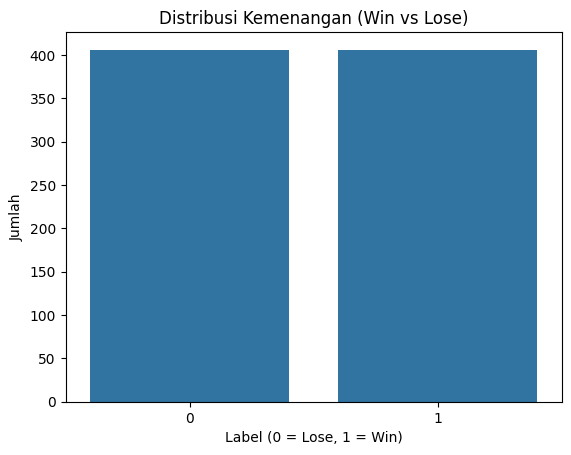

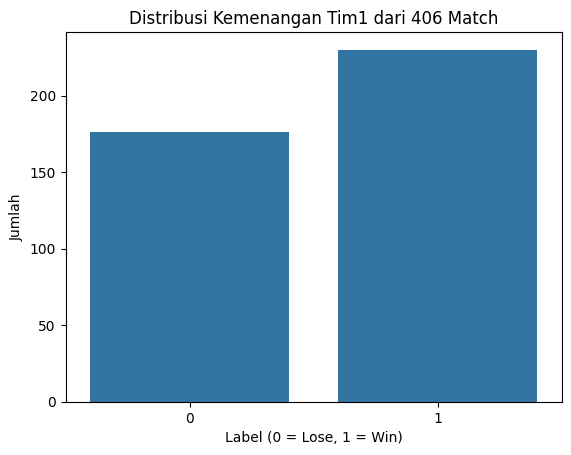

In [272]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Win', data=grouped)
plt.title("Distribusi Kemenangan (Win vs Lose)")
plt.xlabel("Label (0 = Lose, 1 = Win)")
plt.ylabel("Jumlah")
plt.show()

sns.countplot(x='Win_1', data=grouped_pairs)
plt.title("Distribusi Kemenangan Tim1 dari 406 Match")
plt.xlabel("Label (0 = Lose, 1 = Win)")
plt.ylabel("Jumlah")
plt.show()


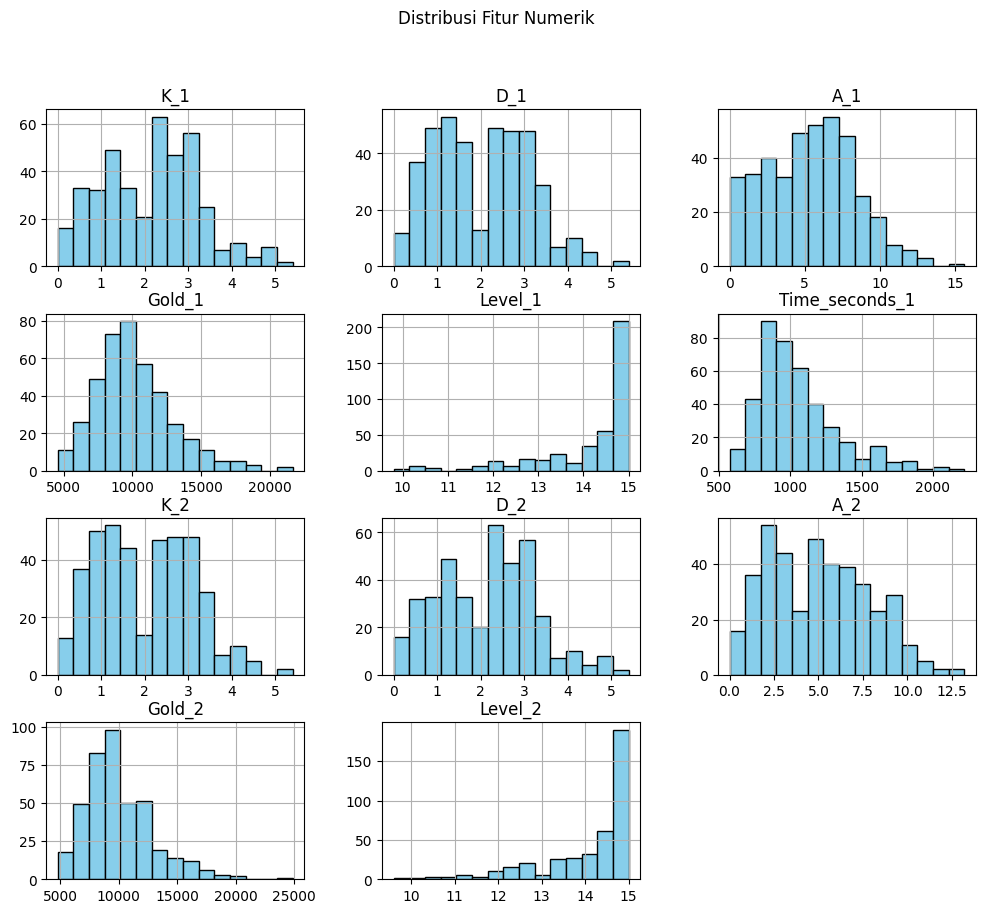

In [273]:
features = ['K_1', 'D_1', 'A_1', 'Gold_1', 'Level_1', 'Time_seconds_1', 'K_2', 'D_2', 'A_2', 'Gold_2', 'Level_2']
grouped_pairs[features].hist(bins=15, figsize=(12, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distribusi Fitur Numerik")
plt.show()


In [274]:
mean_stats = grouped_pairs.groupby('Win_1').mean(numeric_only=True)
display(mean_stats)

,K_1,D_1,A_1,Gold_1,Level_1,Time_seconds_1,K_2,D_2,A_2,Gold_2,Level_2
Win_1,,,,,,,,,,,
0,1.351136,2.813636,3.236364,9119.981591,13.730682,1025.244318,2.812500,1.354545,7.025,10847.392045,14.514773
1,2.767826,1.443478,7.008696,10974.460870,14.552174,1051.456522,1.432174,2.773043,3.480,9445.270435,13.852174


In [275]:
from sklearn.utils import shuffle

combined_pairs = shuffle(grouped_pairs, random_state=42).reset_index(drop=True)
display(grouped_pairs)

,K_1,D_1,A_1,Gold_1,Level_1,Win_1,Time_seconds_1,K_2,D_2,A_2,Gold_2,Level_2
0,3.0,2.8,7.0,11217.0,15.0,0,1104,2.8,3.0,6.0,11746.2,15.0
1,3.2,2.4,7.0,10073.8,14.4,1,992,2.4,3.2,5.0,9559.8,14.8
2,3.4,1.0,9.0,10627.6,15.0,1,1033,1.0,3.4,3.0,9078.4,14.6
3,0.6,1.8,1.4,7379.2,13.2,0,864,1.8,0.6,5.2,9189.8,14.8
4,2.6,1.2,8.2,10517.2,15.0,1,1016,1.2,2.6,2.6,8845.4,14.4
...,...,...,...,...,...,...,...,...,...,...,...,...
401,1.8,2.2,5.2,13800.2,15.0,1,1387,2.2,1.8,5.4,12287.6,15.0
402,1.0,2.8,1.6,10723.4,15.0,0,1164,2.8,1.0,6.6,11890.4,15.0
403,2.2,1.4,5.2,8719.2,14.4,1,845,1.4,2.2,4.8,7588.6,13.0
404,3.2,1.2,10.0,10838.8,15.0,1,1078,1.2,3.2,3.4,9474.4,15.0


In [276]:
grouped_pairs.to_csv("grouped_pairs.csv", index=False)

# Model

Standarisasi

In [ ]:
import numpy as np

X = grouped_pairs.drop(columns=['Win_1'])
y = grouped_pairs['Win_1']

def standarisasi_zscore(data):
    rata_rata = np.mean(data, axis=0)
    standar_deviasi = np.std(data, axis=0)
    return (data - rata_rata) / standar_deviasi

X_normalized = standarisasi_zscore(X)
display(X_normalized)

,K_1,D_1,A_1,Gold_1,Level_1,Time_seconds_1,K_2,D_2,A_2,Gold_2,Level_2
0,0.745109,0.699582,0.552378,0.379468,0.711581,0.229805,0.702458,0.741802,0.348071,0.588220,0.763911
1,0.921195,0.332618,0.552378,-0.035083,0.180511,-0.172942,0.337288,0.918029,-0.005929,-0.171377,0.586379
2,1.097280,-0.951756,1.231558,0.165737,0.711581,-0.025508,-0.940808,1.094256,-0.713929,-0.338625,0.408848
3,-1.367913,-0.217828,-1.349327,-1.012208,-0.881628,-0.633225,-0.210468,-1.372920,0.064871,-0.299922,0.586379
4,0.392939,-0.768274,0.959886,0.125704,0.711581,-0.086639,-0.758223,0.389348,-0.855530,-0.419574,0.231316
...,...,...,...,...,...,...,...,...,...,...,...
401,-0.311402,0.149136,-0.058885,1.316196,0.711581,1.247460,0.154703,-0.315559,0.135671,0.776313,0.763911
402,-1.015743,0.699582,-1.281409,0.200477,0.711581,0.445562,0.702458,-1.020466,0.560471,0.638318,0.763911
403,0.040769,-0.584792,-0.058885,-0.526293,0.180511,-0.701548,-0.575638,0.036895,-0.076729,-0.856210,-1.011406
404,0.921195,-0.768274,1.571148,0.242324,0.711581,0.136310,-0.758223,0.918029,-0.572329,-0.201047,0.763911


In [ ]:
split_index = int(0.8 * len(X))
X_train = X_normalized[:split_index]
X_test = X_normalized[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

Standarisasi Backpropagation Sigmoid

In [279]:
def inisialisasi_bobot(ukuran_layer, seed=42):
    np.random.seed(seed)
    bobot = []
    bias = []
    
    for i in range(len(ukuran_layer) - 1):
        matriks_bobot = np.random.uniform(-1, 1, (ukuran_layer[i + 1], ukuran_layer[i]))
        vektor_bias = np.ones((ukuran_layer[i + 1], 1))
        bobot.append(matriks_bobot)
        bias.append(vektor_bias)
    
    return bobot, bias

# Fungsi aktivasi sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def turunan_sigmoid(x):
    return x * (1 - x)

# Propagasi maju
def propagasi_maju(input_data, bobot, bias):
    znet_hidden = np.dot(bobot[0], input_data) + bias[0]
    z_hidden = sigmoid(znet_hidden)
    
    znet_output = np.dot(bobot[1], z_hidden) + bias[1]
    y_output = sigmoid(znet_output)
    
    return znet_hidden, z_hidden, znet_output, y_output

# Propagasi mundur dan pembaruan bobot
def propagasi_mundur(input_data, target, bobot, bias, z_hidden, y_output, learning_rate):
    error = target - y_output
    sk = error * turunan_sigmoid(y_output)
    sj = np.dot(bobot[1].T, sk) * turunan_sigmoid(z_hidden)
    
    bobot[1] += learning_rate * np.dot(sk, z_hidden.T)
    bias[1] += learning_rate * sk
    
    bobot[0] += learning_rate * np.dot(sj, input_data.T)
    bias[0] += learning_rate * sj

# Inisialisasi
ukuran_layer = [X_train.shape[1], 2, 1]
bobot, bias = inisialisasi_bobot(ukuran_layer)
learning_rate = 0.1
epochs = 50

# Training
for epoch in range(epochs):
    total_loss_epoch = 0
    for i in range(len(X_train)):
        input_data = X_train[i].reshape(-1, 1)
        target = y_train[i].reshape(-1, 1)
        
        znet_hidden, z_hidden, znet_output, y_output = propagasi_maju(input_data, bobot, bias)

        sample_loss = (target - y_output) ** 2
        total_loss_epoch += sample_loss[0][0]

        propagasi_mundur(input_data, target, bobot, bias, z_hidden, y_output, learning_rate)
    
    avg_loss = total_loss_epoch / len(X_train)
    print(f"Epoch {epoch}, Loss: {avg_loss}")

Epoch 0, Loss: 0.2425115847538601
Epoch 1, Loss: 0.2101264235528496
Epoch 2, Loss: 0.16334098894052543
Epoch 3, Loss: 0.12759622458450134
Epoch 4, Loss: 0.10833922389425098
Epoch 5, Loss: 0.09737656811542236
Epoch 6, Loss: 0.09061962982766904
Epoch 7, Loss: 0.08613601461561184
Epoch 8, Loss: 0.08294999704255705
Epoch 9, Loss: 0.08053434614105397
Epoch 10, Loss: 0.07858331084641053
Epoch 11, Loss: 0.07690790292797012
Epoch 12, Loss: 0.07538784472257995
Epoch 13, Loss: 0.07395122013892218
Epoch 14, Loss: 0.07256289032567707
Epoch 15, Loss: 0.07121017898031883
Epoch 16, Loss: 0.06988955092950404
Epoch 17, Loss: 0.06860084531616033
Epoch 18, Loss: 0.06734614844056196
Epoch 19, Loss: 0.06612918434297532
Epoch 20, Loss: 0.06495455960715392
Epoch 21, Loss: 0.06382715699427252
Epoch 22, Loss: 0.06275162977803131
Epoch 23, Loss: 0.06173188302071272
Epoch 24, Loss: 0.06077060464532875
Epoch 25, Loss: 0.059868982039760446
Epoch 26, Loss: 0.05902667633288501
Epoch 27, Loss: 0.05824202608981162
Epo

In [280]:
TP = FP = TN = FN = 0
benar = 0
total = len(X_test)

for i in range(total):
    input_data = X_test[i].reshape(-1, 1)
    target = y_test[i].reshape(-1, 1)
    
    _, _, _, y_output = propagasi_maju(input_data, bobot, bias)
    
    prediksi = 1 if y_output >= 0.5 else 0 
    
    if prediksi == 1 and target == 1:
        TP += 1  # True Positive
    elif prediksi == 1 and target == 0:
        FP += 1  # False Positive
    elif prediksi == 0 and target == 0:
        TN += 1  # True Negative
    elif prediksi == 0 and target == 1:
        FN += 1  # False Negative

    if prediksi == target:
        benar += 1

akurasi = benar / total * 100
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TP / (TP + FN) if (TP + FN) != 0 else 0
specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
f_measure = (2 * precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

print(f"Akurasi: {akurasi:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F-measure: {f_measure:.4f}")


Akurasi: 97.56%
Precision: 0.9778
Recall (Sensitivity): 0.9778
Specificity: 0.9730
F-measure: 0.9778


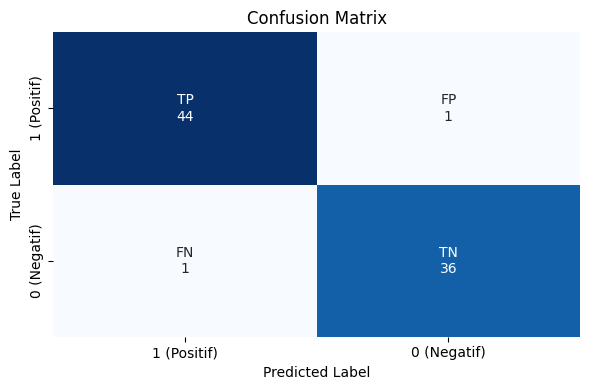

In [281]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

confusion_matrix = np.array([[TP, FP],
                             [FN, TN]])

labels = np.array([["TP", "FP"], ["FN", "TN"]])
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix, annot=labels + "\n" + confusion_matrix.astype(str), fmt='', cmap="Blues", cbar=False,
            xticklabels=["1 (Positif)", "0 (Negatif)"],
            yticklabels=["1 (Positif)", "0 (Negatif)"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

Standarisasi Backpropagation ReLU dan Sigmoid

In [ ]:
def inisialisasi_bobot(ukuran_layer, seed=42):
    np.random.seed(seed)
    bobot = []
    bias = []
    
    for i in range(len(ukuran_layer) - 1):
        matriks_bobot = np.random.uniform(-1, 1, (ukuran_layer[i + 1], ukuran_layer[i]))
        vektor_bias = np.ones((ukuran_layer[i + 1], 1))
        bobot.append(matriks_bobot)
        bias.append(vektor_bias)
    
    return bobot, bias

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def turunan_sigmoid(x):
    return x * (1 - x)

# Fungsi aktivasi ReLu
def relu(x):
    if x > 0:
        return x
    else:
        return 0

def turunan_relu(x):
    if x > 0:
        return 1
    else:
        return 0

# Propagasi maju
def propagasi_maju(input_data, bobot, bias):
    znet_hidden = np.dot(bobot[0], input_data) + bias[0]
    z_hidden = relu(znet_hidden)
    
    znet_output = np.dot(bobot[1], z_hidden) + bias[1]
    y_output = sigmoid(znet_output)
    
    return znet_hidden, z_hidden, znet_output, y_output

# Propagasi mundur dan pembaruan bobot
def propagasi_mundur(input_data, target, bobot, bias, z_hidden, y_output, learning_rate):
    error = target - y_output
    sk = error * turunan_sigmoid(y_output)
    sj = np.dot(bobot[1].T, sk) * turunan_relu(z_hidden)
    
    bobot[1] += learning_rate * np.dot(sk, z_hidden.T)
    bias[1] += learning_rate * sk
    
    bobot[0] += learning_rate * np.dot(sj, input_data.T)
    bias[0] += learning_rate * sj

# Inisialisasi bobot
ukuran_layer = [X_train.shape[1], 2, 1]
bobot, bias = inisialisasi_bobot(ukuran_layer)
learning_rate = 0.1
epochs = 50

# Training
for epoch in range(epochs):
    total_loss_epoch = 0
    for i in range(len(X_train)):
        input_data = X_train[i].reshape(-1, 1)
        target = y_train[i].reshape(-1, 1)
        
        znet_hidden, z_hidden, znet_output, y_output = propagasi_maju(input_data, bobot, bias)

        sample_loss = (target - y_output) ** 2
        total_loss_epoch += sample_loss[0][0]

        propagasi_mundur(input_data, target, bobot, bias, z_hidden, y_output, learning_rate)
    
    avg_loss = total_loss_epoch / len(X_train)
    print(f"Epoch {epoch}, Loss: {avg_loss}")

Epoch 0, Loss: 0.14972974776631423
Epoch 1, Loss: 0.08022748141350881
Epoch 2, Loss: 0.07481953954341837
Epoch 3, Loss: 0.07169390044418977
Epoch 4, Loss: 0.06926008143665599
Epoch 5, Loss: 0.06710476406046335
Epoch 6, Loss: 0.06528884183710862
Epoch 7, Loss: 0.06340639602264977
Epoch 8, Loss: 0.061839203132451004
Epoch 9, Loss: 0.06038952588968788
Epoch 10, Loss: 0.05902583403819846
Epoch 11, Loss: 0.05780338690071815
Epoch 12, Loss: 0.05666553622385094
Epoch 13, Loss: 0.05567296539704857
Epoch 14, Loss: 0.05484076384289372
Epoch 15, Loss: 0.05412622563340683
Epoch 16, Loss: 0.05351381832098571
Epoch 17, Loss: 0.05301478471054324
Epoch 18, Loss: 0.052599258688821565
Epoch 19, Loss: 0.05219369221685769
Epoch 20, Loss: 0.05195567715644116
Epoch 21, Loss: 0.051703100602769655
Epoch 22, Loss: 0.05147496366191984
Epoch 23, Loss: 0.05126053889056716
Epoch 24, Loss: 0.05106132264035626
Epoch 25, Loss: 0.0508758109102551
Epoch 26, Loss: 0.05070268828153533
Epoch 27, Loss: 0.0505340882013295
E

In [283]:
TP = FP = TN = FN = 0
benar = 0
total = len(X_test)

for i in range(total):
    input_data = X_test[i].reshape(-1, 1)
    target = y_test[i].reshape(-1, 1)
    
    _, _, _, y_output = propagasi_maju(input_data, bobot, bias)
    
    prediksi = 1 if y_output >= 0.5 else 0  # Threshold 0.5 untuk klasifikasi biner
    
    if prediksi == 1 and target == 1:
        TP += 1  # True Positive
    elif prediksi == 1 and target == 0:
        FP += 1  # False Positive
    elif prediksi == 0 and target == 0:
        TN += 1  # True Negative
    elif prediksi == 0 and target == 1:
        FN += 1  # False Negative

    if prediksi == target:
        benar += 1

akurasi = benar / total * 100
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TP / (TP + FN) if (TP + FN) != 0 else 0
specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
f_measure = (2 * precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

print(f"Akurasi: {akurasi:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F-measure: {f_measure:.4f}")

Akurasi: 96.34%
Precision: 0.9773
Recall (Sensitivity): 0.9556
Specificity: 0.9730
F-measure: 0.9663


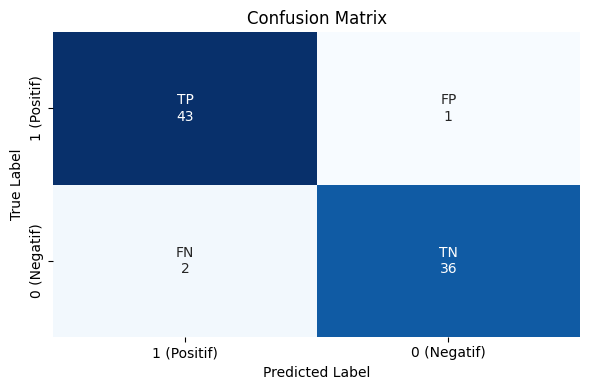

In [284]:
confusion_matrix = np.array([[TP, FP],
                             [FN, TN]])

labels = np.array([["TP", "FP"], ["FN", "TN"]])
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix, annot=labels + "\n" + confusion_matrix.astype(str), fmt='', cmap="Blues", cbar=False,
            xticklabels=["1 (Positif)", "0 (Negatif)"],
            yticklabels=["1 (Positif)", "0 (Negatif)"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

Normalisasi

In [ ]:
import numpy as np

X = grouped_pairs.drop(columns=['Win_1'])
y = grouped_pairs['Win_1']

def normalisasi_minmax(data):
    return (data - np.min(data, axis=0)) / (np.max(data, axis=0) - np.min(data, axis=0))

X_normalized = normalisasi_minmax(X)
display(X_normalized)

,K_1,D_1,A_1,Gold_1,Level_1,Time_seconds_1,K_2,D_2,A_2,Gold_2,Level_2
0,0.555556,0.518519,0.448718,0.388197,1.000000,0.322620,0.518519,0.555556,0.454545,0.345534,1.000000
1,0.592593,0.444444,0.448718,0.321388,0.884615,0.254700,0.444444,0.592593,0.378788,0.236651,0.962963
2,0.629630,0.185185,0.576923,0.353752,1.000000,0.279563,0.185185,0.629630,0.227273,0.212677,0.925926
3,0.111111,0.333333,0.089744,0.163914,0.653846,0.177077,0.333333,0.111111,0.393939,0.218225,0.962963
4,0.481481,0.222222,0.525641,0.347301,1.000000,0.269254,0.222222,0.481481,0.196970,0.201074,0.888889
...,...,...,...,...,...,...,...,...,...,...,...
401,0.333333,0.407407,0.333333,0.539161,1.000000,0.494239,0.407407,0.333333,0.409091,0.372496,1.000000
402,0.185185,0.518519,0.102564,0.359351,1.000000,0.359005,0.518519,0.185185,0.500000,0.352716,1.000000
403,0.407407,0.259259,0.333333,0.242224,0.884615,0.165555,0.259259,0.407407,0.363636,0.138485,0.629630
404,0.592593,0.222222,0.641026,0.366095,1.000000,0.306853,0.222222,0.592593,0.257576,0.232398,1.000000


In [286]:
split_index = int(0.8 * len(X))
X_train = X_normalized[:split_index]
X_test = X_normalized[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

Normalisasi Backpropagation Sigmoid

In [287]:
def inisialisasi_bobot(ukuran_layer, seed=42):
    np.random.seed(seed)
    bobot = []
    bias = []
    
    for i in range(len(ukuran_layer) - 1):
        matriks_bobot = np.random.uniform(-1, 1, (ukuran_layer[i + 1], ukuran_layer[i]))
        vektor_bias = np.ones((ukuran_layer[i + 1], 1))
        bobot.append(matriks_bobot)
        bias.append(vektor_bias)
    
    return bobot, bias

# Fungsi aktivasi sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def turunan_sigmoid(x):
    return x * (1 - x)

# Propagasi maju
def propagasi_maju(input_data, bobot, bias):
    znet_hidden = np.dot(bobot[0], input_data) + bias[0]
    z_hidden = sigmoid(znet_hidden)
    
    znet_output = np.dot(bobot[1], z_hidden) + bias[1]
    y_output = sigmoid(znet_output)
    
    return znet_hidden, z_hidden, znet_output, y_output

# Propagasi mundur dan pembaruan bobot
def propagasi_mundur(input_data, target, bobot, bias, z_hidden, y_output, learning_rate):
    error = target - y_output
    sk = error * turunan_sigmoid(y_output)
    sj = np.dot(bobot[1].T, sk) * turunan_sigmoid(z_hidden)
    
    bobot[1] += learning_rate * np.dot(sk, z_hidden.T)
    bias[1] += learning_rate * sk
    
    bobot[0] += learning_rate * np.dot(sj, input_data.T)
    bias[0] += learning_rate * sj

# Inisialisasi
ukuran_layer = [X_train.shape[1], 2, 1]
bobot, bias = inisialisasi_bobot(ukuran_layer)
learning_rate = 0.1
epochs = 50

# Training
for epoch in range(epochs):
    total_loss_epoch = 0
    for i in range(len(X_train)):
        input_data = X_train[i].reshape(-1, 1)
        target = y_train[i].reshape(-1, 1)
        
        znet_hidden, z_hidden, znet_output, y_output = propagasi_maju(input_data, bobot, bias)

        sample_loss = (target - y_output) ** 2
        total_loss_epoch += sample_loss[0][0]

        propagasi_mundur(input_data, target, bobot, bias, z_hidden, y_output, learning_rate)
    
    avg_loss = total_loss_epoch / len(X_train)
    print(f"Epoch {epoch}, Loss: {avg_loss}")

Epoch 0, Loss: 0.24965538504564638
Epoch 1, Loss: 0.24517967811351016
Epoch 2, Loss: 0.2416804300079813
Epoch 3, Loss: 0.23683440432426264
Epoch 4, Loss: 0.22964143888321262
Epoch 5, Loss: 0.2191554908829969
Epoch 6, Loss: 0.20496635083688444
Epoch 7, Loss: 0.1877860313369749
Epoch 8, Loss: 0.16946356231158977
Epoch 9, Loss: 0.15211642736394526
Epoch 10, Loss: 0.13715140927423644
Epoch 11, Loss: 0.12500419849885658
Epoch 12, Loss: 0.11546361118293606
Epoch 13, Loss: 0.10806715128215627
Epoch 14, Loss: 0.1023362290994741
Epoch 15, Loss: 0.09786699000392843
Epoch 16, Loss: 0.09434638706475765
Epoch 17, Loss: 0.09154056278607411
Epoch 18, Loss: 0.08927719005580265
Epoch 19, Loss: 0.08742948158162965
Epoch 20, Loss: 0.08590370059801661
Epoch 21, Loss: 0.08462997382118452
Epoch 22, Loss: 0.08355570145641388
Epoch 23, Loss: 0.08264087007612633
Epoch 24, Loss: 0.08185471807346603
Epoch 25, Loss: 0.08117335144668991
Epoch 26, Loss: 0.08057802604477353
Epoch 27, Loss: 0.08005389882372883
Epoch 

In [288]:
TP = FP = TN = FN = 0
benar = 0
total = len(X_test)

for i in range(total):
    input_data = X_test[i].reshape(-1, 1)
    target = y_test[i].reshape(-1, 1)
    
    _, _, _, y_output = propagasi_maju(input_data, bobot, bias)
    
    prediksi = 1 if y_output >= 0.5 else 0  # Threshold 0.5 untuk klasifikasi biner
    
    if prediksi == 1 and target == 1:
        TP += 1  # True Positive
    elif prediksi == 1 and target == 0:
        FP += 1  # False Positive
    elif prediksi == 0 and target == 0:
        TN += 1  # True Negative
    elif prediksi == 0 and target == 1:
        FN += 1  # False Negative

    if prediksi == target:
        benar += 1

akurasi = benar / total * 100
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TP / (TP + FN) if (TP + FN) != 0 else 0
specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
f_measure = (2 * precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

print(f"Akurasi: {akurasi:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F-measure: {f_measure:.4f}")

Akurasi: 93.90%
Precision: 0.9348
Recall (Sensitivity): 0.9556
Specificity: 0.9189
F-measure: 0.9451


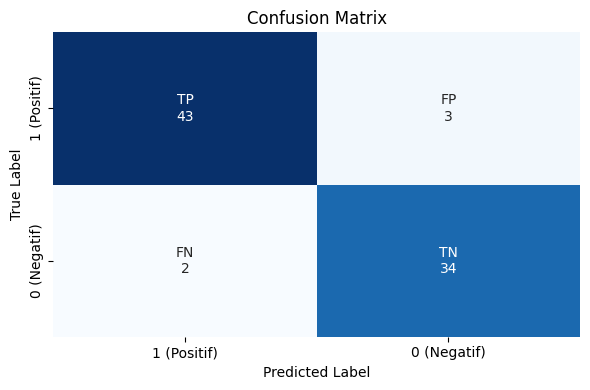

In [289]:
confusion_matrix = np.array([[TP, FP],
                             [FN, TN]])

labels = np.array([["TP", "FP"], ["FN", "TN"]])
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix, annot=labels + "\n" + confusion_matrix.astype(str), fmt='', cmap="Blues", cbar=False,
            xticklabels=["1 (Positif)", "0 (Negatif)"],
            yticklabels=["1 (Positif)", "0 (Negatif)"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

Normalisasi Backpropagation RelU dan Sigmoid

In [ ]:
def inisialisasi_bobot(ukuran_layer, seed=42):
    np.random.seed(seed)
    bobot = []
    bias = []
    
    for i in range(len(ukuran_layer) - 1):
        matriks_bobot = np.random.uniform(-1, 1, (ukuran_layer[i + 1], ukuran_layer[i]))
        vektor_bias = np.ones((ukuran_layer[i + 1], 1))
        bobot.append(matriks_bobot)
        bias.append(vektor_bias)
    
    return bobot, bias

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def turunan_sigmoid(x):
    return x * (1 - x)

# Fungsi aktivasi ReLu
def relu(x):
    if x > 0:
        return x
    else:
        return 0

def turunan_relu(x):
    if x > 0:
        return 1
    else:
        return 0

# Propagasi maju
def propagasi_maju(input_data, bobot, bias):
    znet_hidden = np.dot(bobot[0], input_data) + bias[0]
    z_hidden = relu(znet_hidden)
    
    znet_output = np.dot(bobot[1], z_hidden) + bias[1]
    y_output = sigmoid(znet_output)
    
    return znet_hidden, z_hidden, znet_output, y_output

# Propagasi mundur dan pembaruan bobot
def propagasi_mundur(input_data, target, bobot, bias, z_hidden, y_output, learning_rate):
    error = target - y_output
    sk = error * turunan_sigmoid(y_output)
    sj = np.dot(bobot[1].T, sk) * turunan_relu(z_hidden)
    
    bobot[1] += learning_rate * np.dot(sk, z_hidden.T)
    bias[1] += learning_rate * sk
    
    bobot[0] += learning_rate * np.dot(sj, input_data.T)
    bias[0] += learning_rate * sj

# Inisialisasi bobot
ukuran_layer = [X_train.shape[1], 2, 1]
bobot, bias = inisialisasi_bobot(ukuran_layer)
learning_rate = 0.1
epochs = 50

# Training
for epoch in range(epochs):
    total_loss_epoch = 0
    for i in range(len(X_train)):
        input_data = X_train[i].reshape(-1, 1)
        target = y_train[i].reshape(-1, 1)
        
        znet_hidden, z_hidden, znet_output, y_output = propagasi_maju(input_data, bobot, bias)

        sample_loss = (target - y_output) ** 2
        total_loss_epoch += sample_loss[0][0]

        propagasi_mundur(input_data, target, bobot, bias, z_hidden, y_output, learning_rate)
    
    avg_loss = total_loss_epoch / len(X_train)
    print(f"Epoch {epoch}, Loss: {avg_loss}")

Epoch 0, Loss: 0.25413371520215333
Epoch 1, Loss: 0.21773510655795872
Epoch 2, Loss: 0.1543244460737936
Epoch 3, Loss: 0.11432579586080813
Epoch 4, Loss: 0.09742814258549592
Epoch 5, Loss: 0.08977288702438281
Epoch 6, Loss: 0.08569434044534614
Epoch 7, Loss: 0.08321673513885822
Epoch 8, Loss: 0.08155568859930029
Epoch 9, Loss: 0.08035833767938275
Epoch 10, Loss: 0.07944250102555082
Epoch 11, Loss: 0.0787181278963866
Epoch 12, Loss: 0.07810214769791454
Epoch 13, Loss: 0.07756436120181992
Epoch 14, Loss: 0.07706828000149513
Epoch 15, Loss: 0.07665814673020098
Epoch 16, Loss: 0.07625151679852615
Epoch 17, Loss: 0.07586963816740155
Epoch 18, Loss: 0.07551000556793701
Epoch 19, Loss: 0.07516510088117277
Epoch 20, Loss: 0.07483352393714691
Epoch 21, Loss: 0.07451328264143986
Epoch 22, Loss: 0.07420286079399499
Epoch 23, Loss: 0.07390106752444109
Epoch 24, Loss: 0.07360695516821925
Epoch 25, Loss: 0.07332149303672433
Epoch 26, Loss: 0.07305497650620206
Epoch 27, Loss: 0.07277874509019697
Epoc

In [291]:
TP = FP = TN = FN = 0
benar = 0
total = len(X_test)

for i in range(total):
    input_data = X_test[i].reshape(-1, 1)
    target = y_test[i].reshape(-1, 1)
    
    _, _, _, y_output = propagasi_maju(input_data, bobot, bias)
    
    prediksi = 1 if y_output >= 0.5 else 0  # Threshold 0.5 untuk klasifikasi biner
    
    if prediksi == 1 and target == 1:
        TP += 1  # True Positive
    elif prediksi == 1 and target == 0:
        FP += 1  # False Positive
    elif prediksi == 0 and target == 0:
        TN += 1  # True Negative
    elif prediksi == 0 and target == 1:
        FN += 1  # False Negative

    if prediksi == target:
        benar += 1

akurasi = benar / total * 100
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TP / (TP + FN) if (TP + FN) != 0 else 0
specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
f_measure = (2 * precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

print(f"Akurasi: {akurasi:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F-measure: {f_measure:.4f}")

Akurasi: 95.12%
Precision: 0.9556
Recall (Sensitivity): 0.9556
Specificity: 0.9459
F-measure: 0.9556


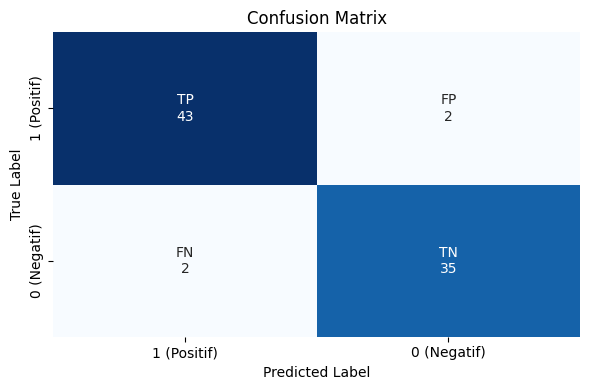

In [292]:
confusion_matrix = np.array([[TP, FP],
                             [FN, TN]])

labels = np.array([["TP", "FP"], ["FN", "TN"]])
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix, annot=labels + "\n" + confusion_matrix.astype(str), fmt='', cmap="Blues", cbar=False,
            xticklabels=["1 (Positif)", "0 (Negatif)"],
            yticklabels=["1 (Positif)", "0 (Negatif)"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

In [ ]:
from matplotlib import plt
from seaborn import sns

confusion_matrix=np.array([TP
])